In [50]:
import pandas as pd

from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout, Bidirectional
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from keras.layers.merge import Concatenate
import matplotlib.gridspec as gridspec

import datetime
from datetime import date
from pandas_datareader import data as pdr

In [51]:
def create_dataset2(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [52]:
look_back=3
trainX=[]
testX=[]
y_train=[]

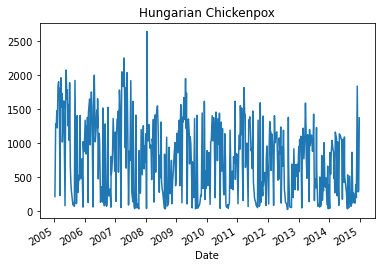

In [53]:
df=pd.read_csv('hungary_chickenpox.csv',parse_dates=['Date'],index_col='Date')

df['Cnt'] = df.sum(axis=1)
#print(df)
df['Cnt'].plot()
plt.title('Hungarian Chickenpox')
plt.show()

In [59]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
f_columns = ['Cnt']
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)

test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [60]:
#cnt_transformer = RobustScaler()
#cnt_transformer = cnt_transformer.fit(train[['Cnt']])
#train['Cnt2'] = cnt_transformer.transform(train[['Cnt']])
#test['Cnt2'] = cnt_transformer.transform(test[['Cnt']])

In [61]:
X_train, y_train = create_dataset2(train, train.Cnt, look_back)
X_test, y_test = create_dataset2(test, test.Cnt, look_back)

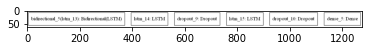

In [62]:
n_future = 1
timeSteps=3

model = Sequential()

model.add(Bidirectional(LSTM(units=128,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]))))


model.add(LSTM(units= 128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 128))
model.add(Dropout(0.2))
model.add(Dense(units = n_future))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])



plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

In [94]:
print(X_train.shape[1], X_train.shape[2])
print(len(X_train),len(X_test))
#print(X_train)

3 21
362 154
[[[ 1.68000000e+02  7.90000000e+01  3.00000000e+01 ...  8.70000000e+01
    6.80000000e+01  9.16429250e-01]
  [ 1.57000000e+02  6.00000000e+01  3.00000000e+01 ...  6.80000000e+01
    2.60000000e+01  5.36562203e-01]
  [ 9.60000000e+01  4.40000000e+01  3.10000000e+01 ...  6.20000000e+01
    4.40000000e+01  4.19753086e-01]]

 [[ 1.57000000e+02  6.00000000e+01  3.00000000e+01 ...  6.80000000e+01
    2.60000000e+01  5.36562203e-01]
  [ 9.60000000e+01  4.40000000e+01  3.10000000e+01 ...  6.20000000e+01
    4.40000000e+01  4.19753086e-01]
  [ 1.63000000e+02  4.90000000e+01  4.30000000e+01 ...  4.30000000e+01
    3.10000000e+01  3.92212726e-01]]

 [[ 9.60000000e+01  4.40000000e+01  3.10000000e+01 ...  6.20000000e+01
    4.40000000e+01  4.19753086e-01]
  [ 1.63000000e+02  4.90000000e+01  4.30000000e+01 ...  4.30000000e+01
    3.10000000e+01  3.92212726e-01]
  [ 1.22000000e+02  7.80000000e+01  5.30000000e+01 ...  8.50000000e+01
    6.00000000e+01  6.03988604e-01]]

 ...

 [[ 9.100000

In [63]:
history=model.fit(X_train, y_train,epochs=10,batch_size=32,
    validation_split=0.1,
    shuffle=False  )

Train on 325 samples, validate on 37 samples
Epoch 1/10
325/325 [==============================] - 2s 6ms/step - loss: 0.2893 - acc: 0.0062 - val_loss: 0.0774 - val_acc: 0.0000e+00
Epoch 2/10
325/325 [==============================] - 0s 693us/step - loss: 0.1484 - acc: 0.0062 - val_loss: 0.1081 - val_acc: 0.0000e+00
Epoch 3/10
325/325 [==============================] - 0s 590us/step - loss: 0.1110 - acc: 0.0062 - val_loss: 0.1622 - val_acc: 0.0000e+00
Epoch 4/10
325/325 [==============================] - 0s 674us/step - loss: 0.1006 - acc: 0.0031 - val_loss: 0.0582 - val_acc: 0.0000e+00
Epoch 5/10
325/325 [==============================] - 0s 624us/step - loss: 0.0669 - acc: 0.0062 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 6/10
325/325 [==============================] - 0s 715us/step - loss: 0.0661 - acc: 0.0062 - val_loss: 0.0899 - val_acc: 0.0000e+00
Epoch 7/10
325/325 [==============================] - 0s 680us/step - loss: 0.0609 - acc: 0.0062 - val_loss: 0.0489 - val_acc: 0.

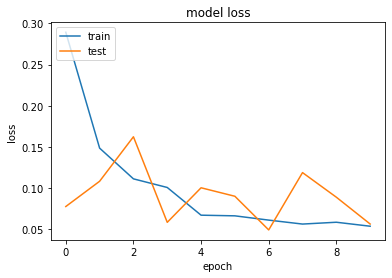

In [64]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

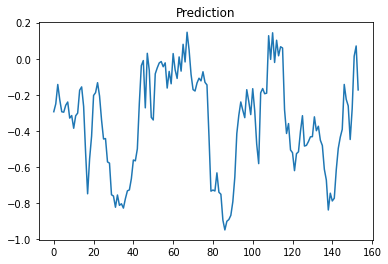

In [96]:
#print(X_test)

prediction = model.predict(X_test)
#print(prediction)
#for i in range(21):
#    print(model.predict(prediction[i:i+look_back,:].reshape(21,3,1)))
    

plt.plot(prediction)
plt.title("Prediction")
plt.show()




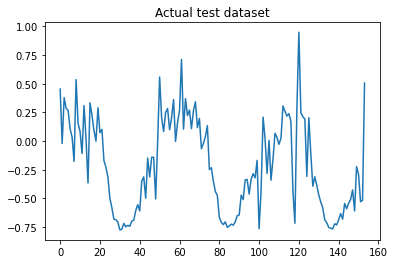

In [97]:
#print(y_test)
#plt.plot(X_test.reshape(-1,1))
#plt.title('Actual test dataset')
#plt.show()
plt.plot(y_test)
plt.title('Actual test dataset')
plt.show()